In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)
clf.fit(x_train,y_train)
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2


In [6]:
y_predic=clf.predict(x_test)

In [6]:
y_predic

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [7]:
y_test

280    0
10     1
105    1
251    0
193    0
      ..
7      1
202    0
264    0
149    1
245    0
Name: target, Length: 61, dtype: int64

In [7]:
clf.score(x_train,y_train)

1.0

In [9]:
clf.score(x_test,y_test)

0.8360655737704918

In [10]:
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score

In [11]:
confusion_matrix(y_test,y_predic)

array([[21,  5],
       [ 5, 30]], dtype=int64)

In [12]:
accuracy_score(y_test,y_predic)

0.8360655737704918

In [13]:

classification_report(y_test,y_predic)

'              precision    recall  f1-score   support\n\n           0       0.81      0.81      0.81        26\n           1       0.86      0.86      0.86        35\n\n    accuracy                           0.84        61\n   macro avg       0.83      0.83      0.83        61\nweighted avg       0.84      0.84      0.84        61\n'

In [14]:
np.random.seed(0)
for i in range(10,100,10):
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(clf.score(x_test,y_test))
    
    

0.819672131147541
0.7704918032786885
0.8688524590163934
0.819672131147541
0.8524590163934426
0.8360655737704918
0.819672131147541
0.8360655737704918
0.819672131147541


In [15]:
import pickle
pickle.dump(clf,open("randomForest_1","wb"))

In [16]:
#converting string into integer to fit the model..

car_sales=pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [29]:
a=car_sales.drop("Price",axis=1)
b=car_sales["Price"]
a_tran,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2)
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_a=transformer.fit_transform(a)
transformed_a


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
pd.DataFrame(transformed_a)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [31]:
np.random.seed(0)
a_tran,a_test,b_train,b_test=train_test_split(transformed_a,b,test_size=0.2)

model.fit(a_tran,b_train)

RandomForestRegressor()

In [33]:
model.score(a_test,b_test)

0.3385921048142325

In [51]:
car_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [57]:


car_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [53]:
#missing Data

car_missing["Make"].fillna("missing",inplace=True)
car_missing["Colour"].fillna("missing",inplace=True)

car_missing["Odometer (KM)"].fillna(car_missing["Odometer (KM)"].mean(),inplace=True)

car_missing["Doors"].fillna(4,inplace=True)



In [61]:
car_missing.dropna(inplace=True)
len(car_missing)

950

In [62]:
n=car_missing.drop("Price",axis=1)
m=car_missing["Price"]



In [66]:
one_hot1=OneHotEncoder()
categorical_features=["Make","Colour","Doors"]
transformer1=ColumnTransformer([("one_hot",one_hot1,categorical_features)],remainder="passthrough")
transformed_n=transformer1.fit_transform(n)
n_trian,n_test,m_train,m_test=train_test_split(transformed_n,m,test_size=0.2)

model.fit(n_trian,m_train)

RandomForestRegressor()

In [67]:
model.score(n_test,m_test)

0.19726293990161003

In [3]:
car_sales_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.dropna(subset=["Price"],inplace=True)
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

# skklear method of filling

from sklearn import impute
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
cat_imputer=SimpleImputer(strategy='constant',fill_value='missing')
door_imputer=SimpleImputer(strategy='constant',fill_value=4)
num_imputer=SimpleImputer(strategy='mean')
cat_feature=["Make","Colour"]
door_feature=["Doors"]
num_feature=["Odometer (KM)"]
imputer=ColumnTransformer([('cat_imputer',cat_imputer,cat_feature),
('door_imputer',door_imputer,door_feature),
('num_imputer',num_imputer,num_feature)

])
filled_x=imputer.fit_transform(x)
car_sales_filled=pd.DataFrame(filled_x,columns=["Make","Color","Doors","Odometer (KM)"])
car_sales_filled

from sklearn.preprocessing import OneHotEncoder
one_hot=OneHotEncoder()
categorical_features=["Make","Color","Doors"]
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transform_x=transformer.fit_transform(car_sales_filled)

In [4]:
np.random.seed(0)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
clf=RandomForestRegressor()
x_train,x_test,y_trian,y_test=train_test_split(transform_x,y,test_size=0.2)
clf.fit(x_train,y_trian)
clf.score(x_test,y_test)


0.1685441749554657

In [5]:
from sklearn.datasets import load_boston
boston =load_boston()
boston
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df

C:\Users\lenovo\Documents\machineLearning\sample_project_1\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets in

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
from sklearn.linear_model import Ridge
np.random.seed(2)
from sklearn.model_selection import train_test_split


x=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,  x_test,   y_trian,  y_test = train_test_split( x , y , test_size=0.2 )
model=Ridge()
x.shape
y_test.shape



(102,)

In [7]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
x_train,  x_test,   y_trian,  y_test = train_test_split( x , y , test_size=0.2 )
model.fit(x_train,y_trian)
model.score(x_test,y_test)

0.8386851302515862

In [2]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
from sklearn.model_selection import train_test_split, cross_val_scoreos
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)
clf.fit(x_train,y_train)
y_predic=clf.predict(x_test)

In [3]:
y_predic

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [4]:
np.mean(y_predic==y_test)

0.8032786885245902

In [5]:
clf.score(x_test,y_test)

0.8032786885245902

In [14]:
y_proba=clf.predict_proba(x_test)

In [15]:
y_proba[:5]

array([[0.41, 0.59],
       [0.31, 0.69],
       [0.41, 0.59],
       [0.6 , 0.4 ],
       [0.35, 0.65]])

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,x,y)

array([0.85245902, 0.90163934, 0.80327869, 0.83333333, 0.76666667])

In [3]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\lenovo\Documents\machineLearning\sample_project_1\env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.3.29  |       haa95532_0         122 KB
    seaborn-0.11.2             |     pyhd3eb1b0_0         218 KB
    ------------------------------------------------------------
                                           Total:         340 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.11.2-pyhd3eb1b0_0

The following packages will be UPDATED:

  ca-certificates                       2022.2.1-haa95532_0 --> 2022.3.29-haa95532_0




seaborn-0.11.2       | 218 KB    |            |   0% 
seaborn-0.11.2       | 218 KB    | 7          |   7% 
seaborn-0.11.2       | 218 KB    | #####8     |  59%



==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [9]:
import seaborn as sns
sns.set(font_scale=1.5)
from sklearn.metrics import confusion_matrix, classification_report
conm=confusion_matrix(y_test,y_predic)
con=classification_report(y_test,y_predic)



In [10]:
con

'              precision    recall  f1-score   support\n\n           0       0.78      0.78      0.78        27\n           1       0.82      0.82      0.82        34\n\n    accuracy                           0.80        61\n   macro avg       0.80      0.80      0.80        61\nweighted avg       0.80      0.80      0.80        61\n'

<AxesSubplot:>

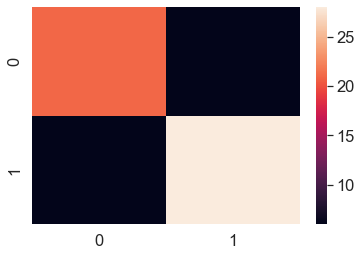

In [8]:
sns.heatmap(conm)

In [23]:
from sklearn.datasets import load_boston
boston =load_boston()
boston
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df
from sklearn.ensemble import RandomForestRegressor
np.random.seed(2)
from sklearn.model_selection import train_test_split

model=RandomForestRegressor()
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,  x_test,   y_trian,  y_test = train_test_split( x , y , test_size=0.2 )

x.shape
model.fit(x_train,y_trian)


C:\Users\lenovo\Documents\machineLearning\sample_project_1\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets in

RandomForestRegressor()

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [14]:
y_test_mean=np.full(len(y_test),y_test.mean())

In [16]:
r2_score(y_test ,y_test_mean)

0.0

In [17]:
r2_score(y_test ,y_test)

1.0

In [24]:
y_pred=model.predict(x_test)

In [27]:
mae=mean_absolute_error(y_test,y_pred)

In [28]:
mae

2.0778039215686266

In [32]:
mse=mean_squared_error(y_test,y_pred)

In [6]:
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)
clf.fit(x_train,y_train)
y_predic=clf.predict(x_test)

In [7]:
cv_acc=cross_val_score(clf,x,y,cv=5)

In [8]:
cv_acc

array([0.83606557, 0.90163934, 0.78688525, 0.76666667, 0.8       ])

In [9]:
cv_acc=cross_val_score(clf,x,y,cv=5 ,scoring="accuracy")

In [10]:
cv_acc

array([0.80327869, 0.90163934, 0.78688525, 0.76666667, 0.78333333])

In [11]:
cv_acc=cross_val_score(clf,x,y,cv=5 ,scoring="precision")
cv_acc

array([0.82857143, 0.93548387, 0.83870968, 0.83870968, 0.725     ])

In [12]:
cv_acc=cross_val_score(clf,x,y,cv=5 ,scoring="recall")
cv_acc

array([0.84848485, 0.87878788, 0.81818182, 0.87878788, 0.84848485])

In [14]:
cv_acc=cross_val_score(clf,x,y,cv=5 ,scoring="f1")
cv_acc
np.mean(cv_acc)

0.8321248704347296

In [15]:
from sklearn.datasets import load_boston
boston =load_boston()
boston
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df
from sklearn.ensemble import RandomForestRegressor
np.random.seed(2)
from sklearn.model_selection import train_test_split

model=RandomForestRegressor()
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,  x_test,   y_trian,  y_test = train_test_split( x , y , test_size=0.2 )

x.shape
model.fit(x_train,y_trian)

C:\Users\lenovo\Documents\machineLearning\sample_project_1\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets in

RandomForestRegressor()

In [16]:
cv_r2=cross_val_score(model,x,y,cv=5 ,scoring="r2")
cv_r2

array([0.75309578, 0.84348161, 0.7300628 , 0.46258803, 0.27804595])

In [18]:
cv_mae=cross_val_score(model,x,y,cv=5 ,scoring="neg_mean_absolute_error")
cv_mae

array([-2.16564706, -2.60118812, -3.37249505, -3.87777228, -3.35173267])

In [21]:
cv_mse=cross_val_score(model,x,y,cv=5 ,scoring="neg_mean_squared_error")
cv_mse

array([ -8.07684701, -13.27397005, -20.11103288, -45.48060586,
       -20.63318685])

In [6]:
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)
clf.fit(x_train,y_train)
y_predic=clf.predict(x_test)

print(f"accuracy={accuracy_score(y_test,y_predic) *100:.2f} recall_score={recall_score(y_test,y_predic) *100:.2f} precision_score={precision_score(y_test,y_predic) *100:.2f} f1_score={f1_score(y_test,y_predic) *100:.2f}")

accuracy=81.97 recall_score=87.50 precision_score=80.00 f1_score=83.58


In [27]:
from sklearn.datasets import load_boston
boston =load_boston()
boston
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.ensemble import RandomForestRegressor
np.random.seed(2)
from sklearn.model_selection import train_test_split

model=RandomForestRegressor()
x=boston_df.drop("target",axis=1)
y=boston_df["target"]
x_train,  x_test,   y_trian,  y_test = train_test_split( x , y , test_size=0.2 )

x.shape
model.fit(x_train,y_trian)
y_predic=model.predict(x_test)

print(f"mean_absolute_error={mean_absolute_error(y_test,y_predic):.2f} mean_squared_error={mean_squared_error(y_test,y_predic):.2f} r2_score={r2_score(y_test,y_predic) *100:.2f}")

C:\Users\lenovo\Documents\machineLearning\sample_project_1\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets in

mean_absolute_error=2.08 mean_squared_error=8.04 r2_score=90.39


In [7]:
def evaluate_cass(y_true,y_pred):
    '''
    '''
    accuracy=accuracy_score(y_true,y_pred)
    precision=precision_score(y_true,y_pred)
    recall=recall_score(y_true,y_pred)
    f1=f1_score(y_true,y_pred)
    metric_dic={
        "accuracy":round(accuracy,2),
         "precision":round(precision,2),
         "recall":round(recall,2),
         "f1":round(f1,2)
    }
    print(f"accuracy={accuracy *100:.2f}")
    print(f"precision={precision:.2f}")
    print(f"recall={recall:.2f}")
    print(f"f1={f1:.2f}")
    return metric_dic

In [8]:
heart_disease_shuffled=heart_disease.sample(frac=1)
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]
len(x)

303

In [9]:
train_split=round(0.7*len(heart_disease_shuffled))
valid_split=round(train_split+0.15* len(heart_disease_shuffled))
x_train,y_trian=x[:train_split],y[:train_split]
x_valid,y_valid=x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test=x[valid_split:],y[valid_split:]
len(x_train) , len(x_valid), len(x_test)

(212, 45, 46)

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(x_train,y_trian)
y_predic=clf.predict(x_valid)
evaluate_cass(y_valid,y_predic)


accuracy=84.44
precision=0.88
recall=0.85
f1=0.87


{'accuracy': 0.84, 'precision': 0.88, 'recall': 0.85, 'f1': 0.87}

In [11]:
clf2=RandomForestClassifier(max_depth=10)
clf2.fit(x_train,y_trian)
y_predic2=clf2.predict(x_valid)
evaluate_cass(y_valid,y_predic2)

accuracy=86.67
precision=0.92
recall=0.85
f1=0.88


{'accuracy': 0.87, 'precision': 0.92, 'recall': 0.85, 'f1': 0.88}

In [13]:
from sklearn.model_selection import RandomizedSearchCV,
grid={
    "n_estimators":[10,20,100,200,1000],
    "max_depth":[None,5,10,20,30],
    "max_features":["auto","sqrt"],
    "min_samples_split":[2,4,6],
    "min_samples_leaf":[1,2,3]
}
np.random.seed(12)
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

from sklearn.model_selection import train_test_split
x_train,  x_test,   y_trian,  y_test = train_test_split( x , y , test_size=0.2 )
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_jobs=1)
clf_ra=RandomizedSearchCV(estimator=clf,param_distributions=grid,n_iter=10,cv=5,verbose=2)
clf_ra.fit(x_train,y_trian)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 20, 100, 200,
                                                         1000]},
                   verbose=2)

In [14]:
clf_ra.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [25]:
ra_y_pred=clf_ra.predict(x_test)
evaluate_cass(y_test,ra_y_pred)


accuracy=86.89
precision=0.89
recall=0.89
f1=0.89


{'accuracy': 0.87, 'precision': 0.89, 'recall': 0.89, 'f1': 0.89}

In [23]:
from sklearn.model_selection import GridSearchCV
grid2={
    "n_estimators":[10,20,100],
    "max_depth":[None],
    "max_features":["auto","sqrt"],
    "min_samples_split":[2,4],
    "min_samples_leaf":[1,2]
}
np.random.seed(12)
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

from sklearn.model_selection import train_test_split
x_train,  x_test,   y_trian,  y_test = train_test_split( x , y , test_size=0.2 )
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_jobs=1)
clf_ga=GridSearchCV(estimator=clf,param_grid=grid2,cv=5,verbose=2)
clf_ga.fit(x_train,y_trian)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_esti

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 20, 100]},
             verbose=2)

In [24]:
clf_ga.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 20}

In [26]:
rg_y_pred=clf_ga.predict(x_test)
evaluate_cass(y_test,rg_y_pred)

accuracy=86.89
precision=0.91
recall=0.86
f1=0.89


{'accuracy': 0.87, 'precision': 0.91, 'recall': 0.86, 'f1': 0.89}

In [27]:
import pickle
pickle.dump(clf_ga,open("reandom_forest.pkl","wb"))

In [28]:
load_pk=pickle.load(open("reandom_forest.pkl","rb"))

In [29]:
load_pk

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 20, 100]},
             verbose=2)